**House Price (step-by-step modeling):**




This core is a step by step analysis from data mining to feature selection and modeling in order to solve House Pricing with Advanced Regression Analysis. Here are the different parts of this core:



In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import datetime
import warnings
warnings.filterwarnings("ignore")

Loading Dataset and Showing starting 5 Rows in the dataset

In [367]:
data = pd.read_csv("/content/train-chennai-sale .csv")
data.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.00,1.00,3,AbNormal,Yes,...,AllPub,Paved,A,4.00,3.90,4.90,4.33,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.00,1.00,5,AbNormal,No,...,AllPub,Gravel,RH,4.90,4.20,2.50,3.77,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.00,1.00,3,AbNormal,Yes,...,ELO,Gravel,RL,4.10,3.80,2.20,3.09,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.00,2.00,5,Family,No,...,NoSewr,Paved,I,4.70,3.90,3.60,4.01,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.00,1.00,3,AbNormal,Yes,...,AllPub,Gravel,C,3.00,2.50,4.10,3.29,237000,74063,7406250


In [368]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.00,1.00,3,AbNormal,Yes,...,AllPub,Paved,A,4.00,3.90,4.90,4.33,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.00,1.00,5,AbNormal,No,...,AllPub,Gravel,RH,4.90,4.20,2.50,3.77,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.00,1.00,3,AbNormal,Yes,...,ELO,Gravel,RL,4.10,3.80,2.20,3.09,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.00,2.00,5,Family,No,...,NoSewr,Paved,I,4.70,3.90,3.60,4.01,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.00,1.00,3,AbNormal,Yes,...,AllPub,Gravel,C,3.00,2.50,4.10,3.29,237000,74063,7406250


Finding the DataTypes of Each Column

In [369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

# **Data Cleaning**

Finding Null Values

In [370]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

Check the histogram to get how data skewed and nulls Visually will be butter

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff613fa3850>,
      dtype=object)

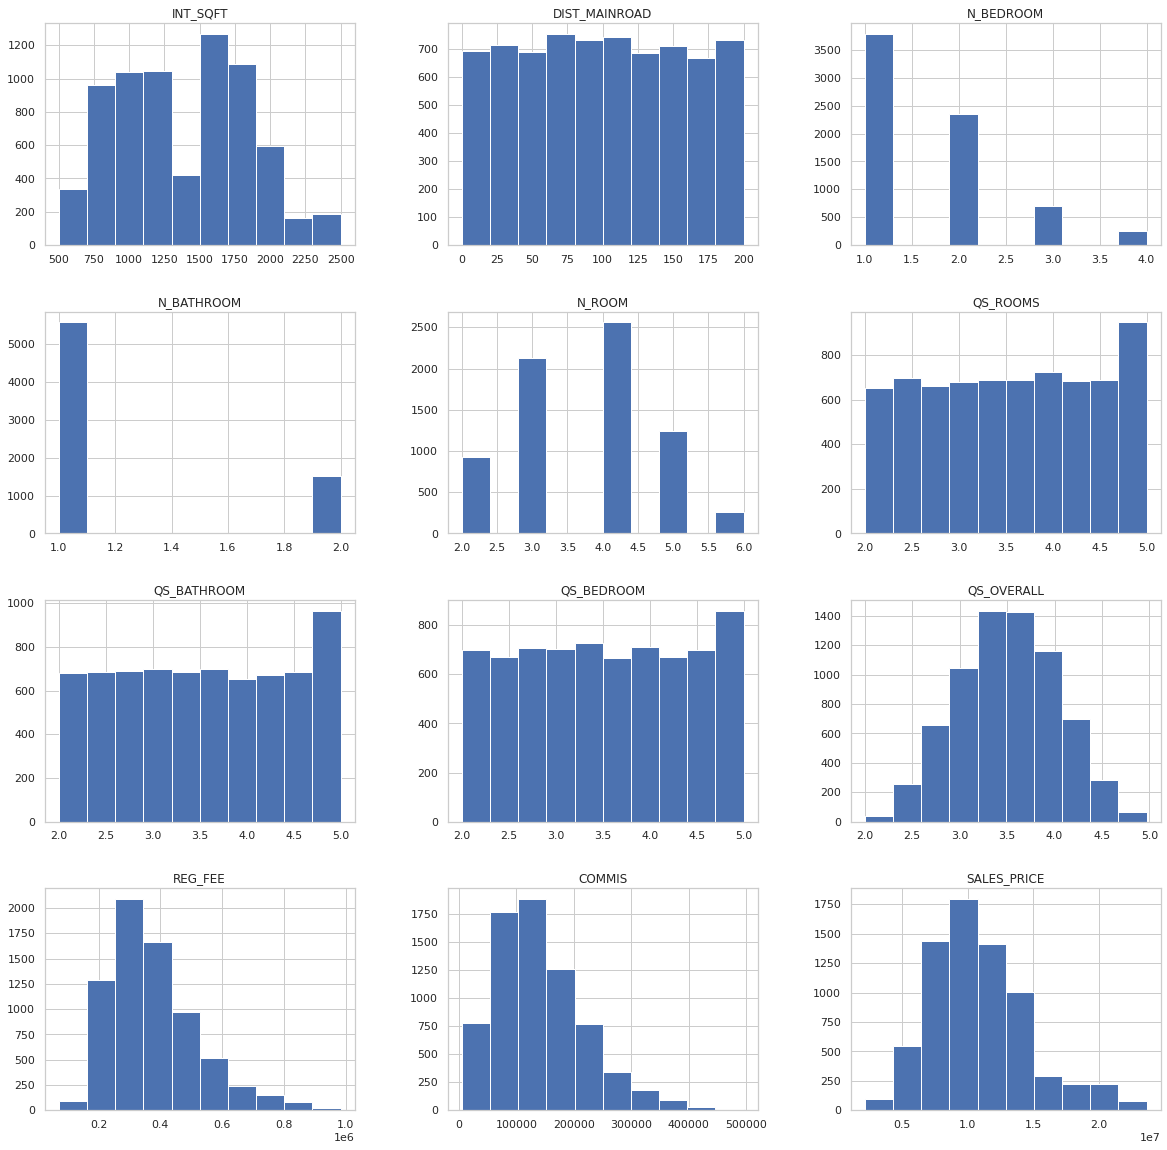

In [371]:
data.hist(figsize = (20 ,20))[0]

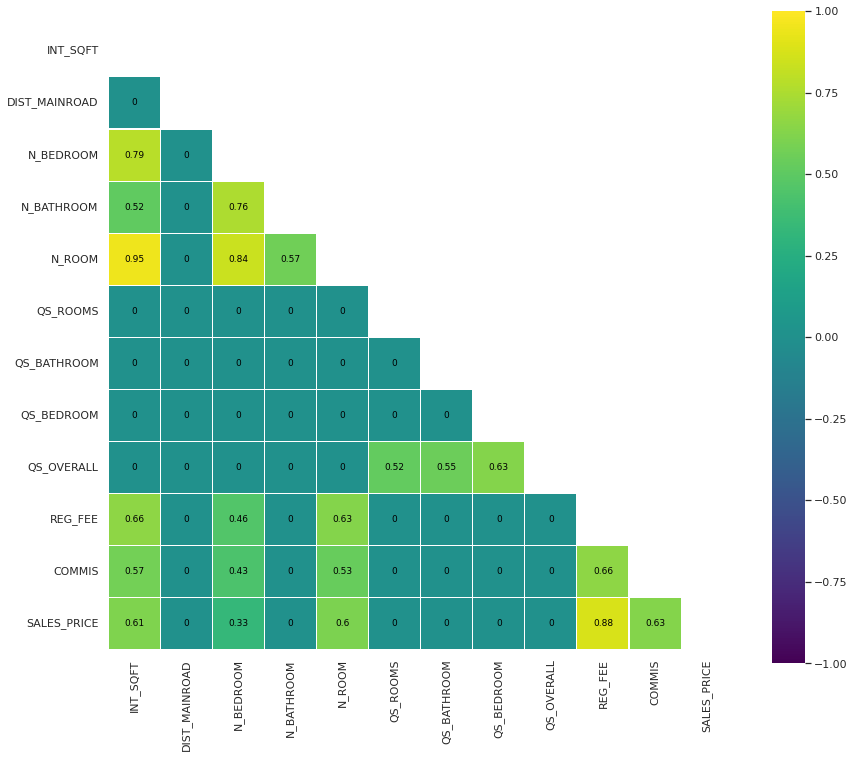

In [372]:
# Heatmap for all the remaining numerical data including the taget 'SalePrice'

# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix
corr_matrix =data.corr()

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

Filling the Null Values. Discrete values with Mode and Contionous Values with Mean

In [373]:
data['N_BEDROOM'].fillna(data['N_BEDROOM'].mode()[0],inplace = True)   #for discrete values need to imputate with mode
data['N_BATHROOM'].fillna(data['N_BATHROOM'].mode()[0],inplace = True)
data['QS_OVERALL'].fillna(data['QS_OVERALL'].mean(),inplace = True)     #for contionus values need to imputate with mdan or median

DataTypes Conversion

In [374]:
data.N_BEDROOM = data.N_BEDROOM.astype('int64')
data.N_BATHROOM = data.N_BATHROOM.astype('int64')
data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'])
data['DATE_BUILD'] = pd.to_datetime(data['DATE_BUILD'])
data['DATE_BUILD']

0      1967-05-15
1      1995-12-22
2      1992-09-02
3      1988-03-18
4      1979-10-13
          ...    
7104   1962-01-15
7105   1995-11-04
7106   1978-01-09
7107   1977-11-08
7108   1961-07-24
Name: DATE_BUILD, Length: 7109, dtype: datetime64[ns]

### **OUTLIERS DETECTION USING Z-SCORE and BOX POLT**

In [375]:
sum(((data.INT_SQFT - data.INT_SQFT.mean())/data.INT_SQFT.std()) >3 )      # outliers lies between >3 or <-3 of zscore value

0

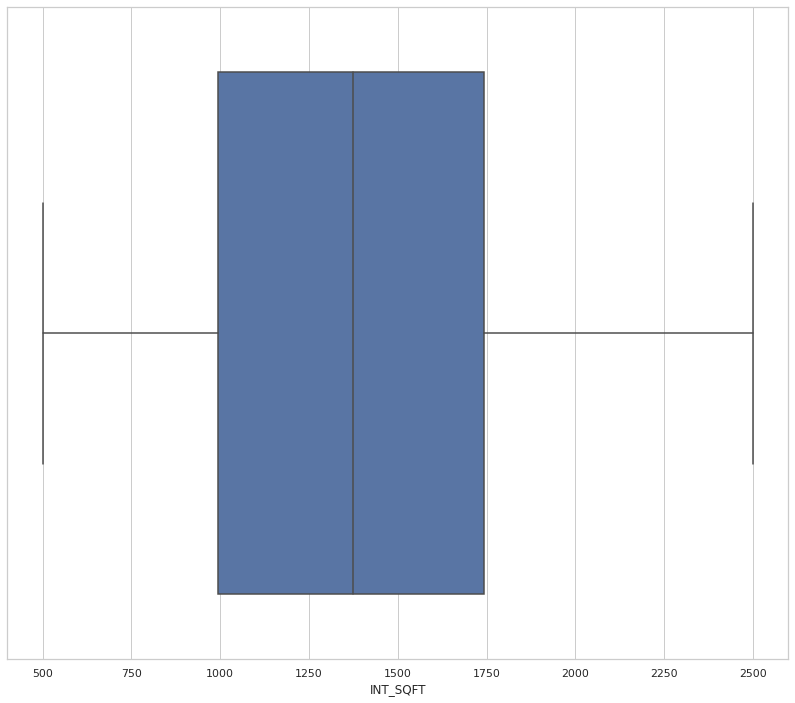

In [376]:
sns.boxplot(x = 'INT_SQFT',data = data)

In [377]:
sum(((data.DIST_MAINROAD - data.DIST_MAINROAD.mean())/data.DIST_MAINROAD.std()) >3 )

0

In [378]:
sum(((data.N_BEDROOM - data.N_BEDROOM.mean())/data.N_BEDROOM.std()) >3 )

0

In [379]:
sum(((data.N_BATHROOM - data.N_BATHROOM.mean())/data.N_BATHROOM.std()) >3 )

0

In [380]:
sum(((data.N_ROOM - data.N_ROOM.mean())/data.N_ROOM.std()) >3 )

0

In [381]:
sum(((data.SALES_PRICE - data.SALES_PRICE.mean())/data.SALES_PRICE.std()) >3 )

37

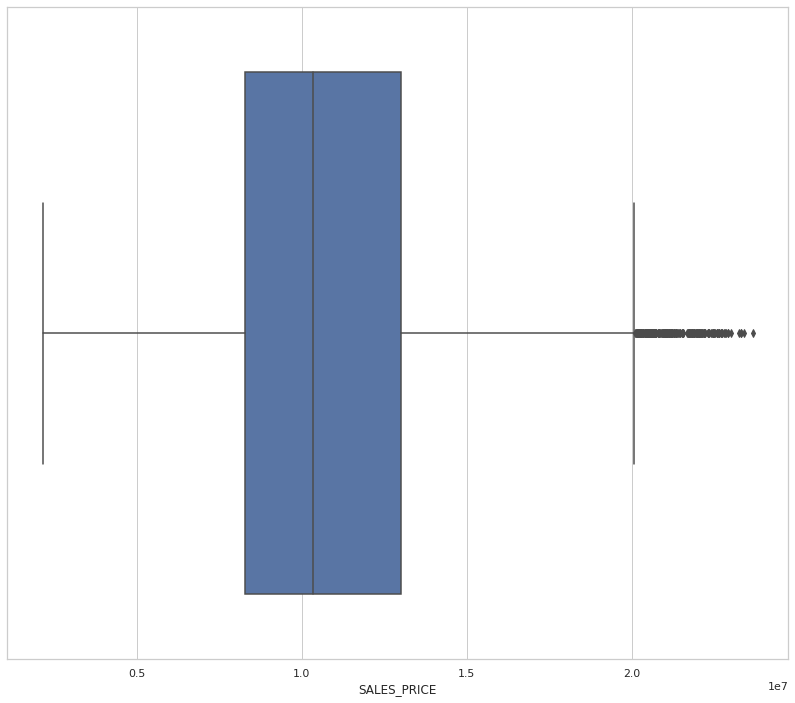

In [382]:
sns.boxplot(x = 'SALES_PRICE',data = data)

as sales price Depends on several factors dont need to correct the outliers

## **Spelling Mistakes Correction**

In [383]:
data["AREA"] = data["AREA"].replace({"Karapakam":"Karapakkam","Ann Nagar":"Anna Nagar","Ana Nagar":"Anna Nagar","Adyr":"Adyar","Velchery":"Velachery",
                                     "Chrompt":"Chrompet","Chrmpet":"Chrompet", "Chormpet":"Chrompet","KKNagar":"KK Nagar","TNagar":"T Nagar"})

In [384]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [385]:
data['SALE_COND'] = data['SALE_COND'].replace({'Ab Normal' : 'AbNormal','ParatiaLl': 'Partial','Partiall':'Partial','PartiaLl':'Partial',
                                                                                                                                'Adj Land':  'AdjLand'})

In [386]:
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [387]:
data.BUILDTYPE = data.BUILDTYPE.replace({"Other":"Others","Comercial":"Commercial"})

In [388]:
data.UTILITY_AVAIL = data.UTILITY_AVAIL.replace({"All Pub":"AllPub",'NoSewr ':'NoSeWa'})

In [389]:
data.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [390]:
data.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [391]:
data.PARK_FACIL = data.PARK_FACIL.replace({"Noo" : "No"})

In [392]:
data.STREET = data.STREET.replace({"NoAccess" : "No Access",'Pavd':'Paved'})

In [393]:
data.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

Generating New Features from the Dataset

In [394]:
data["PARK_FACIL"] = data['PARK_FACIL'].map({'Yes':1,'No':0})
data.PARK_FACIL= data.PARK_FACIL.astype('int64')

In [395]:
data['AGE_OF_BUILDING'] = data['DATE_SALE'].dt.year - data['DATE_BUILD'].dt.year
data['AGE_OF_BUILDING']


0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: AGE_OF_BUILDING, Length: 7109, dtype: int64

In [396]:
data['TOTAL_SALES_PRICE'] = data["REG_FEE"] + data["COMMIS"]+ data["SALES_PRICE"]

# **Exploratory Data Analysis**

### **Distribution Plots**

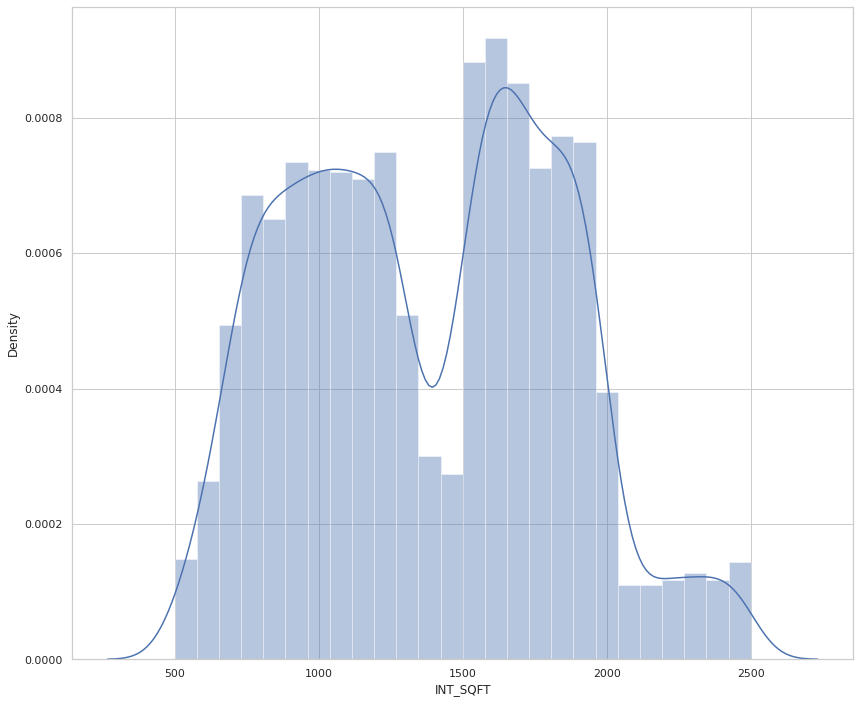

In [397]:
sns.distplot(data.INT_SQFT)
#dist,histogram

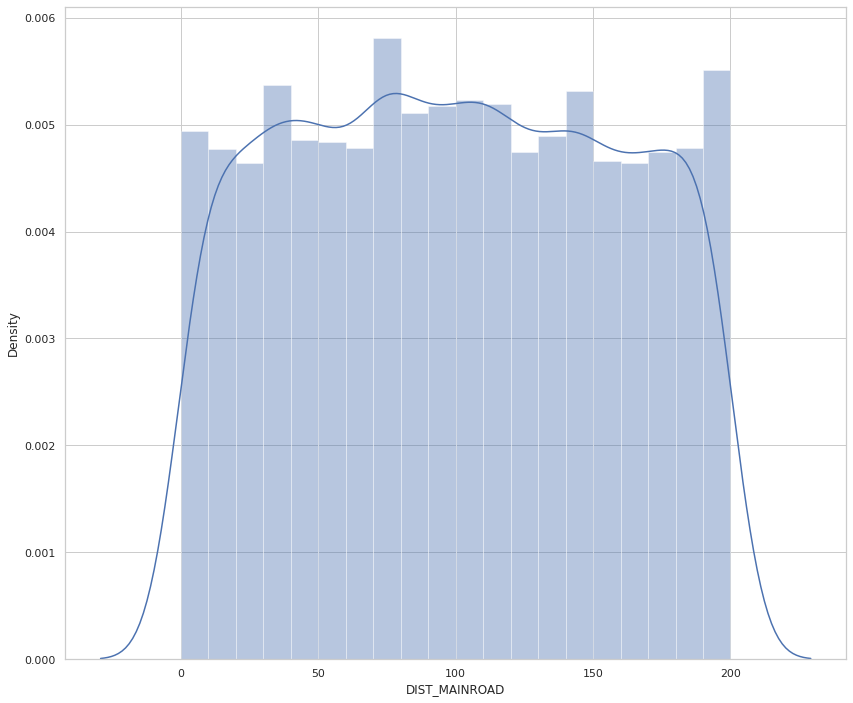

In [398]:
sns.distplot(data.DIST_MAINROAD)

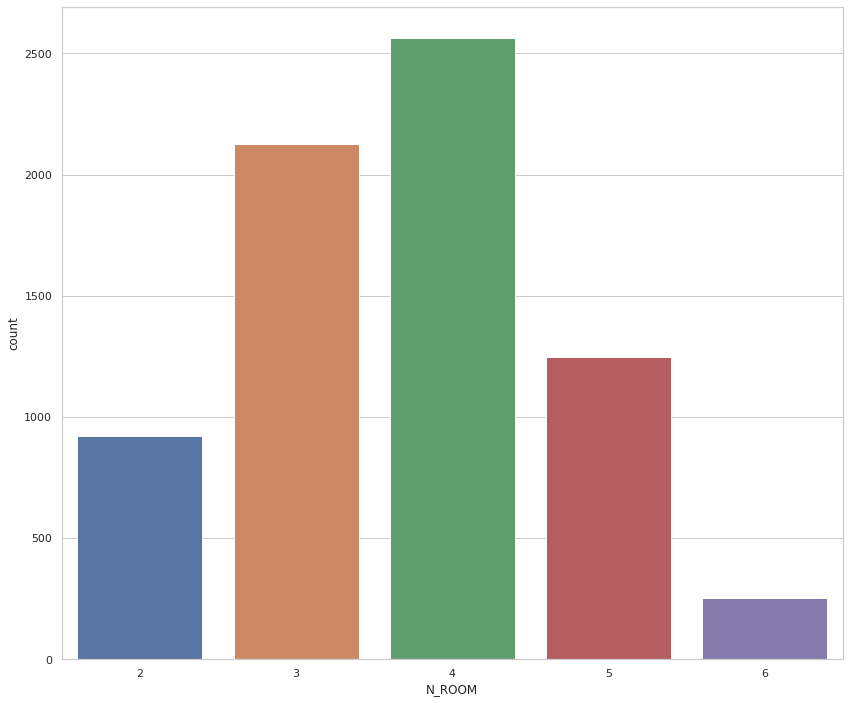

In [399]:
sns.countplot(data['N_ROOM'])
#discret variable bargraph

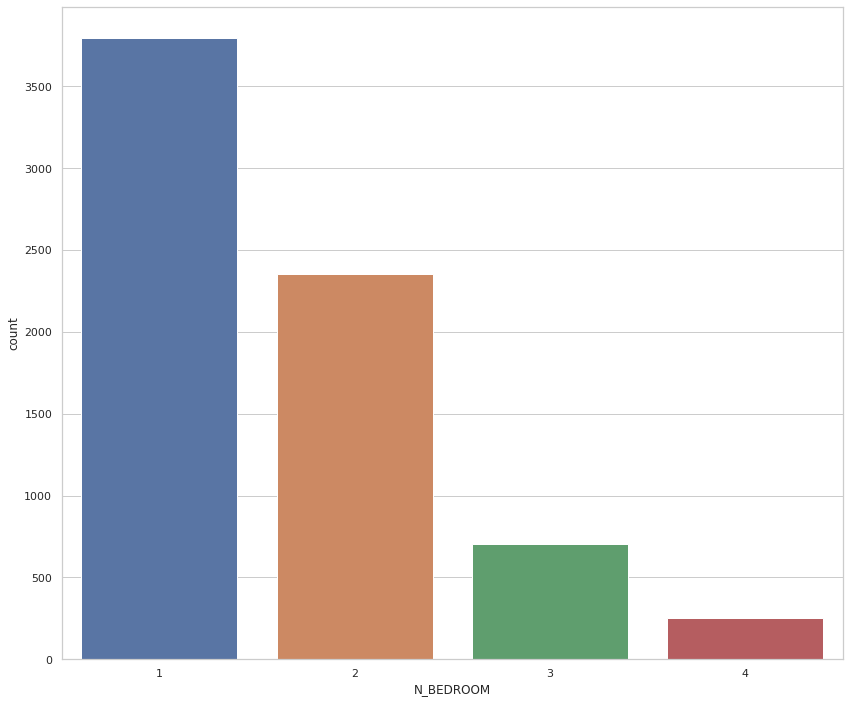

In [400]:
sns.countplot(data['N_BEDROOM'])
#discret variable bargraph

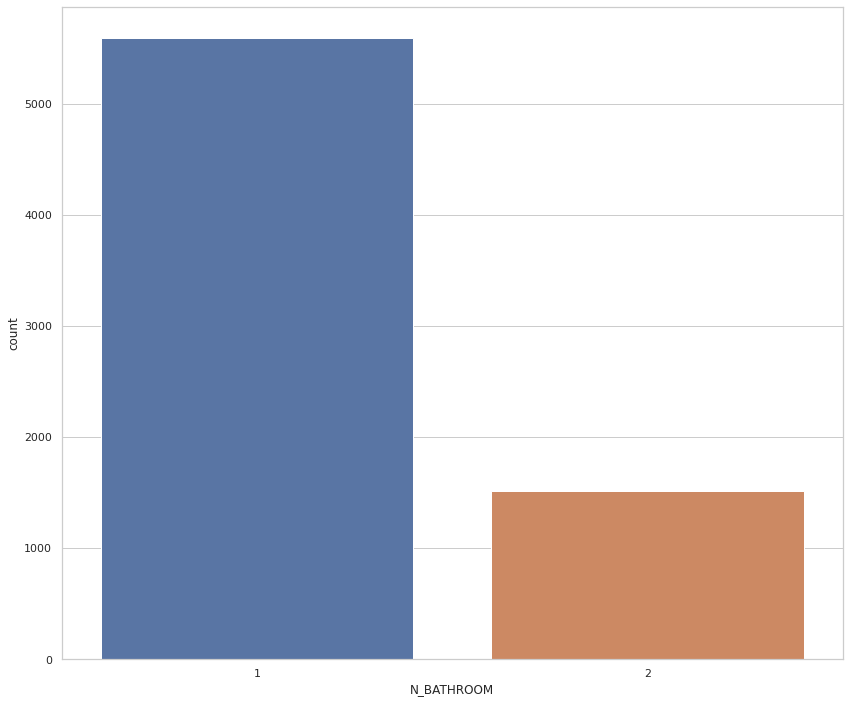

In [401]:
sns.countplot(data['N_BATHROOM'])
#discret variable bargraph

In [402]:
value = data['SALE_COND'].value_counts()
name = data['SALE_COND'].unique()

fig1 = px.pie(data,values = value, names=name, color = value,title="SALE_COND")
fig1

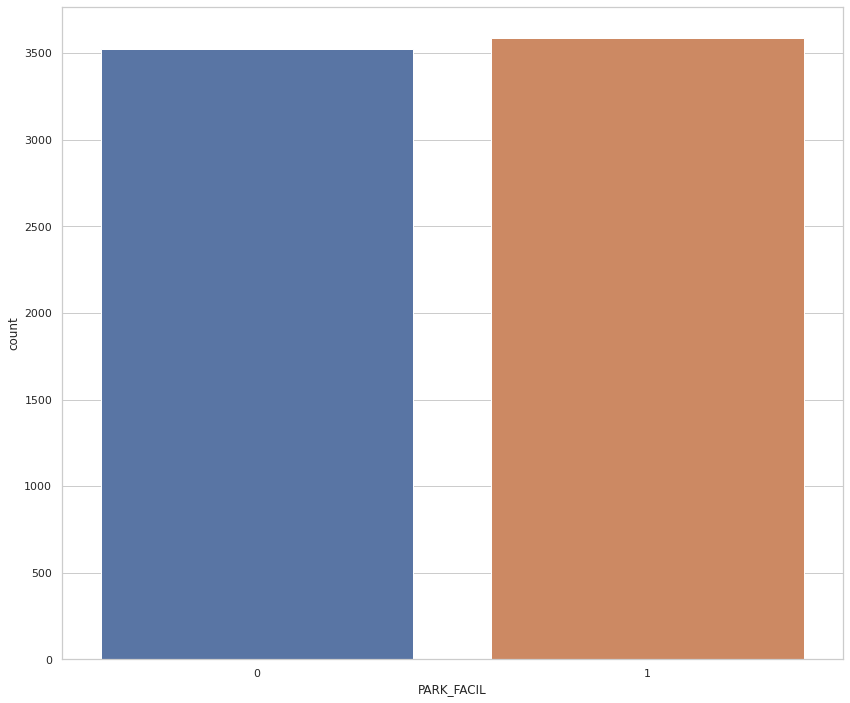

In [403]:
sns.countplot(data['PARK_FACIL'])

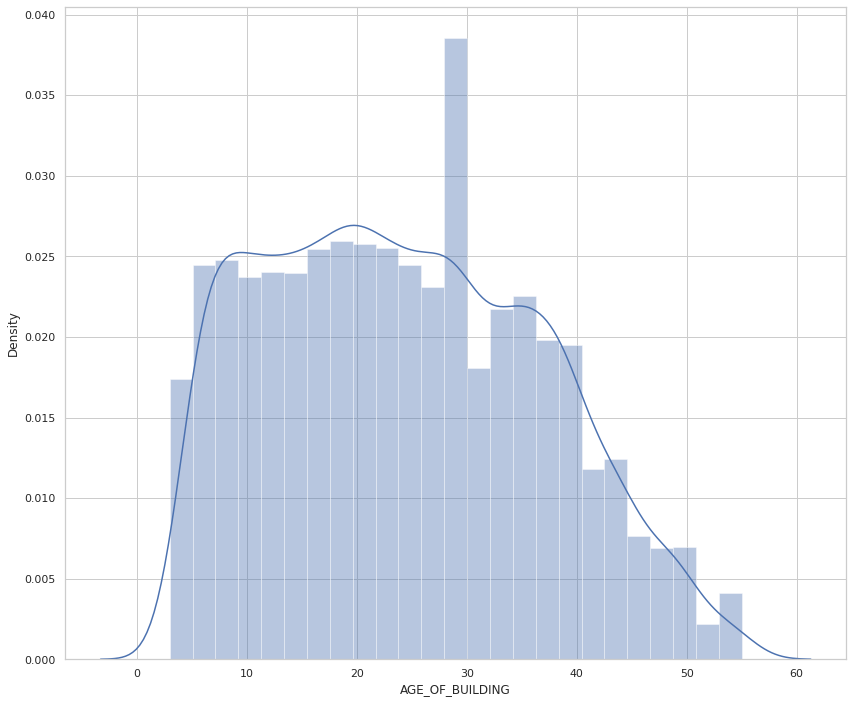

In [404]:
sns.distplot(data.AGE_OF_BUILDING)

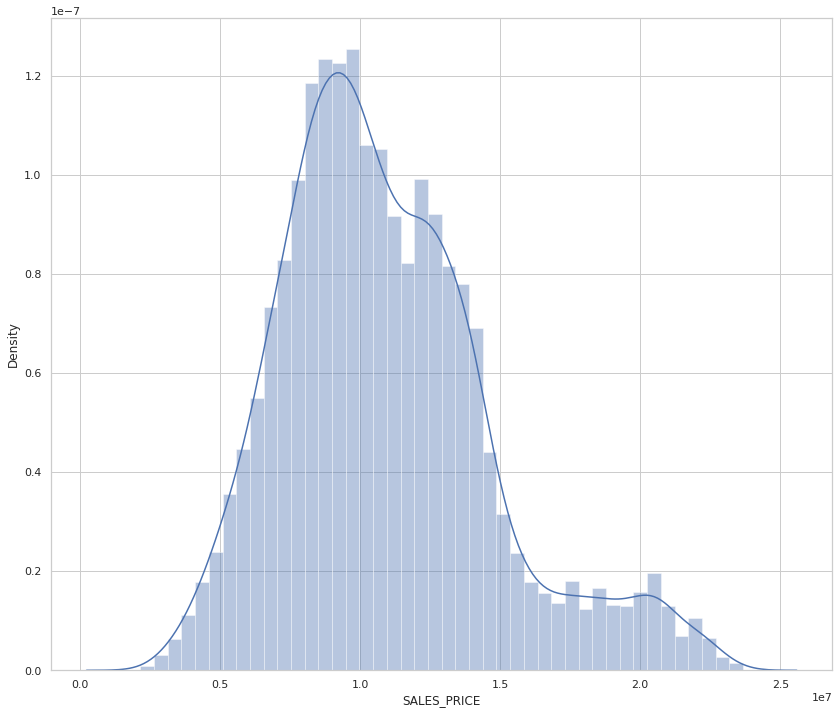

In [405]:
sns.distplot(data.SALES_PRICE)

### **EDA for Feature vs Target**

In [406]:
x = pd.DataFrame(data.groupby('AREA')["TOTAL_SALES_PRICE"].mean())
y = data['AREA'].unique()
y = sorted(y)
df2 = {'AREA':y,"AVERAGE_PRICE":x['TOTAL_SALES_PRICE']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'AREA',y = 'AVERAGE_PRICE', color = 'AREA', title = "AREA VS AVERAGE_PRICE")
fig1

-> from the **Area vs Average_Total_Price** plot we can interpret that Area T Nagar has Highest House Price.after T Nagar the Areas                  KK Nagar, Velachery,Chrompet,Adyar and Karapakkam has linearly Decreasing the price of the Houses.
So, We can Predict the price of the House on Area wise, we will get idea What is the Demand for Houses in the Area. Future Profits if Invest by Area wise Prediction.


In [407]:
fig1 = px.scatter(data,x = 'INT_SQFT', y = 'TOTAL_SALES_PRICE', color = 'INT_SQFT' ,title="INT_SQFT VS TOTAL_SALES_PRICE")
fig1

From **INT_SQFT VS TOTAL_SALES_PRICE** Plot we can Interpret that if Square feet's of House Increase than there will be increase in Price of the House.
in this plot we can see linearity Clearly.

In [408]:
fig2 = px.scatter(data,x = 'DIST_MAINROAD', y = 'TOTAL_SALES_PRICE', color = 'DIST_MAINROAD',title="DIST_MAINROAD VS TOTAL_SALES_PRICE")
fig2

From **DIST_MAINROAD VS TOTAL_SALES_PRICE** Plot we can see that there is no Relationship for DIST_MAIND and Total_Sales_price. in General if Distance from Main Road is less  House price will be Higher but in this dataset Distance from mainroad is not showing any impact on Price.

In [409]:
x = pd.DataFrame(data.groupby('N_ROOM')["TOTAL_SALES_PRICE"].mean())
y = data['N_ROOM'].unique()
y = sorted(y)
df2 = {'N_ROOM':y,"AVERAGE_PRICE":x['TOTAL_SALES_PRICE']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'N_ROOM',y = 'AVERAGE_PRICE', color = 'N_ROOM', title = "N_ROOM VS AVERAGE_PRICE")
fig1


From **N_ROOM Vs Average_Price** we can interpret that No of Rooms Increases Price of the House will also increase. above plot is showing that House with 6 Rooms has Higher price and price is Linearly Decreasing if no of rooms Decreases

In [410]:
x = pd.DataFrame(data.groupby('N_BEDROOM')["TOTAL_SALES_PRICE"].mean())
y = data['N_BEDROOM'].unique()
y = sorted(y)
df2 = {'N_BEDROOM':y,"AVERAGE_PRICE":x['TOTAL_SALES_PRICE']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'N_BEDROOM',y = 'AVERAGE_PRICE', color = 'N_BEDROOM', title = "N_BEDROOM VS AVERAGE_PRICE")
fig1


From **N_BEDROOM Vs Average_Price** we can interpret that No of Bed Rooms Increases Price of the House will also increase. above plot is showing that House with 4 Bed Rooms has Higher price and price is Linearly Decreasing if no of Bed Rooms Decreases

In [411]:
x = pd.DataFrame(data.groupby('N_BATHROOM')["TOTAL_SALES_PRICE"].mean())
y = data['N_BATHROOM'].unique()
y = sorted(y)
df2 = {'N_BATHROOM':y,"AVERAGE_PRICE":x['TOTAL_SALES_PRICE']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'N_BATHROOM',y = 'AVERAGE_PRICE', color = 'N_BATHROOM', title = "N_BATHROOM VS AVERAGE_PRICE")
fig1


From **N_BATHROOM Vs Average_Price** we can interpret The House With 2 Bath Rooms has Higher Price than The House With 1 Bath Room. So The Price Will Be Higher for House with 2 Bath Rooms

In [412]:
x = pd.DataFrame(data.groupby('SALE_COND')["TOTAL_SALES_PRICE"].mean())
y = data['SALE_COND'].unique()
y = sorted(y)
df2 = {'SALE_COND':y,"AVERAGE_PRICE":x['TOTAL_SALES_PRICE']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'SALE_COND',y = 'AVERAGE_PRICE', color = 'SALE_COND', title = "SALE_COND VS AVERAGE_PRICE")
fig1

From The Plot **SALE_COND VS AVERAGE_PRICE** We Interpreted That Houses with different Sale Condition are not Varying Too Much. Prices are varying a little amount. here we got AdjLand has some good value than others

In [413]:
x = pd.DataFrame(data.groupby('BUILDTYPE')["TOTAL_SALES_PRICE"].mean())
y = data['BUILDTYPE'].unique()
y = sorted(y)
df2 = {'BUILDTYPE':y,"AVERAGE_PRICE":x['TOTAL_SALES_PRICE']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'BUILDTYPE',y = 'AVERAGE_PRICE', color = 'BUILDTYPE', title = "BUILDTYPE VS AVERAGE_PRICE")
fig1

From the Plot **BUILDTYPE VS AVERAGE_PRICE** Interpreted that the Commerical Houses has Much Higher Prices than the  Normal Houses and Non Commercial Purpose Houses. So Price for Commercial Buildings will have Much Higher Prices.

In [414]:
x = pd.DataFrame(data.groupby('UTILITY_AVAIL')["TOTAL_SALES_PRICE"].mean())
y = data['UTILITY_AVAIL'].unique()
y = sorted(y)
df2 = {'UTILITY_AVAIL':y,"AVERAGE_PRICE":x['TOTAL_SALES_PRICE']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'UTILITY_AVAIL',y = 'AVERAGE_PRICE', color = 'UTILITY_AVAIL', title = "UTILITY_AVAIL VS AVERAGE_PRICE")
fig1

From The Plot **UTILITY_AVAIL VS AVERAGE_PRICE** Interpreted that Utility availabity is showing less impact on House Price we can see from the plot that there are not much Diffrence in the prices of Houses Based on Utility availabity but All Public Facility Feature has some higher Price

In [415]:
x = pd.DataFrame(data.groupby('STREET')["TOTAL_SALES_PRICE"].mean())
y = data['STREET'].unique()
y = sorted(y)
df2 = {'STREET':y,"AVERAGE_PRICE":x['TOTAL_SALES_PRICE']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'STREET',y = 'AVERAGE_PRICE', color = 'STREET', title = "STREET VS AVERAGE_PRICE")
fig1

From The Plot **STREET VS AVERAGE_PRICE** Interpreted that Street with Gravel and Paved roads have some Higher Prices than the No Access. for Gravel road and Paved roads there is not much Difference in the Price

In [416]:
x = pd.DataFrame(data.groupby('MZZONE')["TOTAL_SALES_PRICE"].mean())
y = data['MZZONE'].unique()
y = sorted(y)
df2 = {'MZZONE':y,"AVERAGE_PRICE":x['TOTAL_SALES_PRICE']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'MZZONE',y = 'AVERAGE_PRICE', color = 'MZZONE', title = "MZZONE VS AVERAGE_PRICE")
fig1

From The Plot **MZZONE VS AVERAGE_PRICE** intrepreted the price of the Houses Zone Wise. we sorted the prices of the House According to Zone. Zone RM have Higher House Price and others zones are linearly decreasing in price. 

In [417]:
x = pd.DataFrame(data.groupby('AGE_OF_BUILDING')["TOTAL_SALES_PRICE"].mean())
y = data['AGE_OF_BUILDING'].unique()
y = sorted(y)
df2 = {'AGE_OF_BUILDING':y,"AVERAGE_PRICE":x['TOTAL_SALES_PRICE']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'AGE_OF_BUILDING',y = 'AVERAGE_PRICE', color = 'AGE_OF_BUILDING', title = "AGE_OF_BUILDING VS AVERAGE_PRICE")
fig1

From The Plot **AGE_OF_BUILDING VS AVERAGE_PRICE** Intrepreted that the age is not showing much impact on the price Because here some factors like Commerical Houses, Facilites, Street will have different Prices. so when comes to age of buliding normal house with 5years old will have lesser price than Commercial House with 15 years old.

In [418]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,"7,109.00","1,382.07",457.41,500.00,993.00,"1,373.00","1,744.00","2,500.00"
DIST_MAINROAD,"7,109.00",99.60,57.40,0.00,50.00,99.00,148.00,200.00
N_BEDROOM,"7,109.00",1.64,0.80,1.00,1.00,1.00,2.00,4.00
N_BATHROOM,"7,109.00",1.21,0.41,1.00,1.00,1.00,1.00,2.00
N_ROOM,"7,109.00",3.69,1.02,2.00,3.00,4.00,4.00,6.00
PARK_FACIL,"7,109.00",0.50,0.50,0.00,0.00,1.00,1.00,1.00
QS_ROOMS,"7,109.00",3.52,0.89,2.00,2.70,3.50,4.30,5.00
QS_BATHROOM,"7,109.00",3.51,0.90,2.00,2.70,3.50,4.30,5.00
QS_BEDROOM,"7,109.00",3.49,0.89,2.00,2.70,3.50,4.30,5.00
QS_OVERALL,"7,109.00",3.50,0.53,2.00,3.13,3.50,3.88,4.97


data.describe() is showing all the stastical infromation like count, mean value,max and min values. 

# **ENCODING**

In [419]:
area = {'Karapakkam':0, 'Adyar':1, 'Chrompet':2, 'Velachery':3, 'KK Nagar':4,'Anna Nagar':5, 'T Nagar':6}
data['AREA'] = data.AREA.map(area)

In [420]:
sale_cond = {'Partial':0, 'Family':1, 'AbNormal':2,'Normal Sale':3, 'AdjLand':4}
data['SALE_COND'] = data.SALE_COND.map(sale_cond)

In [421]:
buildtype = {'House':0, 'Others':1, 'Commercial':2}
data['BUILDTYPE'] = data.BUILDTYPE.map(buildtype)             

In [422]:
utility_avail = {'ELO':0, 'NoSeWa':1, 'AllPub':2}
data['UTILITY_AVAIL'] = data.UTILITY_AVAIL.map(utility_avail)

In [423]:
street = {'No Access':0, 'Paved':1, 'Gravel':2}
data['STREET'] = data.STREET.map(street)

In [424]:
mzzone = {'A':0,'C':1,'I':2,'RH':3,'RL':4, 'RM':5}
data['MZZONE'] = data.MZZONE.map(mzzone)

In [425]:
# ONE_HOT_ENCODING
#data = pd.get_dummies(data, columns = ['BUILDTYPE'])

### **Droping Some Feature**

In [426]:
data = data.drop(columns = ['PRT_ID','DATE_SALE','DIST_MAINROAD','DATE_BUILD','QS_ROOMS','QS_BEDROOM','QS_BATHROOM','QS_OVERALL','REG_FEE','COMMIS','SALES_PRICE'])
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,AGE_OF_BUILDING,TOTAL_SALES_PRICE
0,0,1004,1,1,3,2,1,2,2,1,0,44,8124400
1,5,1986,2,1,5,2,0,2,2,2,3,11,22781941
2,1,909,1,1,3,2,1,2,0,2,4,20,13672408
3,3,1855,3,2,5,1,0,1,1,1,2,22,10063653
4,0,1226,1,1,3,2,1,1,2,2,1,30,7717313


From the Dataset We Dropped some Features DATE_SALE and DATE_BUILD from this two feature we extracted information age of the building and created new column.
from features Regrestration Fee, Commision and Sale Price we added this 3 features and created total sales price of the House.
here we dropped all the QS features as it is Masked data the features are not giving some exact information.
Dropped DIST_MAINROAD has there is No Relationship in the feature we dropped the DIST_MAINROAD

In [427]:
data.reset_index(drop=True, inplace=True)

In [428]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AREA               7109 non-null   int64
 1   INT_SQFT           7109 non-null   int64
 2   N_BEDROOM          7109 non-null   int64
 3   N_BATHROOM         7109 non-null   int64
 4   N_ROOM             7109 non-null   int64
 5   SALE_COND          7109 non-null   int64
 6   PARK_FACIL         7109 non-null   int64
 7   BUILDTYPE          7109 non-null   int64
 8   UTILITY_AVAIL      7109 non-null   int64
 9   STREET             7109 non-null   int64
 10  MZZONE             7109 non-null   int64
 11  AGE_OF_BUILDING    7109 non-null   int64
 12  TOTAL_SALES_PRICE  7109 non-null   int64
dtypes: int64(13)
memory usage: 722.1 KB


# **Co-Relation**

### **Checking Co-Relation of Feature vs Target**

In [429]:
Correlation_Matrix = data.select_dtypes(np.number).corr()
fig = px.imshow(Correlation_Matrix, text_auto=True  , color_continuous_scale=px.colors.sequential.Viridis)
fig.layout.height = 1000
fig.layout.width = 1000
fig.show()

Some Feature's Didn't Have Co-realtion with Target. Even after trying some Transformations there is no improvemet in the Co-relation. so taken that features for Model Building without Transformation.

In [430]:
data.head(2)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,AGE_OF_BUILDING,TOTAL_SALES_PRICE
0,0,1004,1,1,3,2,1,2,2,1,0,44,8124400
1,5,1986,2,1,5,2,0,2,2,2,3,11,22781941


Chennai House Price Prediction data after Cleaning,encoding and after droping soem features

# **DATA SPLITTING**

In [431]:
X = data[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'AGE_OF_BUILDING']].values #values will convert to array of features
y = data['TOTAL_SALES_PRICE'].values #array of targets


In [432]:
from sklearn.model_selection import train_test_split  #spliting the dataset into train and test dataset. 80% for train and 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45) 

# **DATA SCALING**

In [433]:
from sklearn.preprocessing import StandardScaler # Scaling for linear Regression is not strictly required for better practice we are doing standardscaling
scaler = StandardScaler() #initialise to a variable for standard scaler
scaler.fit(X_train,y_train) #fitting the train datset.we dont fit test dataset as we are going to use the test dataset directly for evalution
X_train_scaled = scaler.transform(X_train) #transform of train data
X_test_scaled = scaler.transform(X_test) #transform of test data


In [434]:
r2_value = []
cross_vali = []

# **Model Fitting For Different Regression Models**

### **Linear Regression Model**

In [435]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [436]:
y_pred = regressor.predict(X_test_scaled)

In [437]:
print( 'intercept:', regressor.intercept_)

intercept: 11386025.090909092


In [438]:
print( 'Coefficient:', regressor.coef_)

Coefficient: [ 1060013.22784153   814036.17242742 -1285476.57934533   112486.98885183
  1751243.23220305   222545.19397411   543746.22157836  1978867.61142482
    67554.95127978   424129.82364134   912893.53837473  -233795.05207548]


### **Linear Regression Model Loss Function and Evalution Metrics for Test Dataset**

In [439]:
#Loss Function and Evalution Metrics for Test Dataset
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
r2_value.append(metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 1052790.8613044247
Mean Squared Error: 1761845290453.552
R2- SCORE: 0.8885853095955235


In [440]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,10144514,"11,273,720.82"
1,8923229,"8,536,741.42"
2,7440277,"5,547,333.17"
3,6353206,"5,714,051.15"
4,14536578,"16,092,612.58"
...,...,...
1417,3768608,"4,456,389.96"
1418,11392695,"11,582,055.71"
1419,22326003,"19,046,740.16"
1420,9974473,"10,380,224.77"


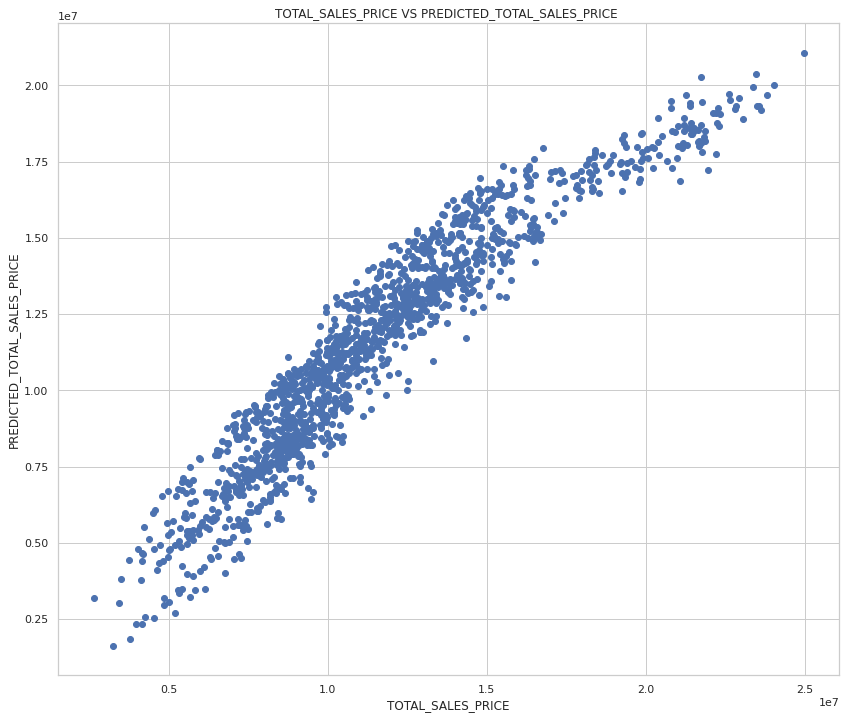

In [441]:
plt.scatter(y_test, y_pred)
plt.xlabel("TOTAL_SALES_PRICE")
plt.ylabel("PREDICTED_TOTAL_SALES_PRICE")
plt.title("TOTAL_SALES_PRICE VS PREDICTED_TOTAL_SALES_PRICE ")
plt.show()

### **Cross Validation Score of Linear Regression Model**

In [442]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True) #untrained model

In [443]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cross_vali.append(cv_results['test_score'].mean())
cv_results['test_score'].mean()

0.8832373583019896

### **Feature selection of Linear Regression Model using RFE and SFS**

In [444]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'AGE_OF_BUILDING'],selector.support_))

[('AREA', False),
 ('INT_SQFT', False),
 ('N_BEDROOM', True),
 ('N_BATHROOM', False),
 ('N_ROOM', True),
 ('SALE_COND', False),
 ('PARK_FACIL', False),
 ('BUILDTYPE', True),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', False),
 ('AGE_OF_BUILDING', False)]

In [445]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train, y_train)
print(list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'AGE_OF_BUILDING'],sfs.get_support())))

[('AREA', True), ('INT_SQFT', False), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', False), ('SALE_COND', False), ('PARK_FACIL', False), ('BUILDTYPE', True), ('UTILITY_AVAIL', False), ('STREET', False), ('MZZONE', False), ('AGE_OF_BUILDING', False)]


### **Random Forest Regressor Model**

In [446]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train_scaled, y_train)


RandomForestRegressor()

In [447]:
# Model prediction on test data
y_pred = reg.predict(X_test_scaled)

### **Loss Function and Evalution Metrics of Random Forest Regressor Model**

In [448]:
print('R^2:',metrics.r2_score(y_test,y_pred))
r2_value.append(metrics.r2_score(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))

R^2: 0.9898939183723325
MAE: 312638.54790436005
MSE: 159811531639.1857


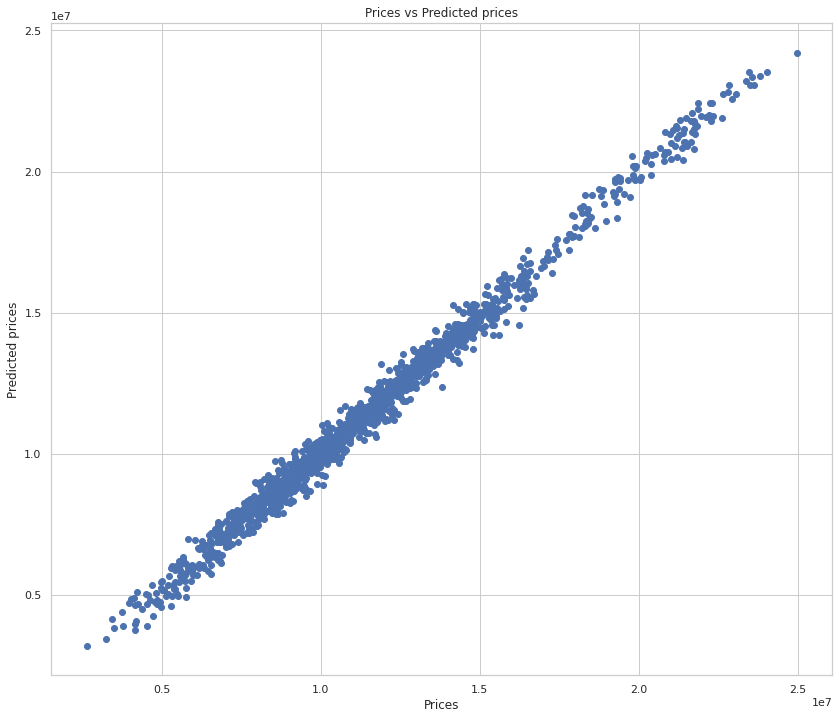

In [449]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

### **Cross Validation Score of Random Forest Regressor Model**

In [450]:
from sklearn.model_selection import cross_validate
regressor = RandomForestRegressor() #untrained model

In [451]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cross_vali.append(cv_results['test_score'].mean())
cv_results['test_score'].mean()

0.9899225042840609

### **Feature Selection of Random Forest Regressor Model using RFE and SFS**

In [452]:
from sklearn.feature_selection import RFE
estimator = RandomForestRegressor()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'AGE_OF_BUILDING'],selector.support_))

[('AREA', True),
 ('INT_SQFT', True),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('SALE_COND', False),
 ('PARK_FACIL', False),
 ('BUILDTYPE', True),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', False),
 ('AGE_OF_BUILDING', False)]

In [453]:
estimator = RandomForestRegressor()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train, y_train)
print(list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'AGE_OF_BUILDING'],sfs.get_support())))

[('AREA', True), ('INT_SQFT', False), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', False), ('SALE_COND', False), ('PARK_FACIL', False), ('BUILDTYPE', True), ('UTILITY_AVAIL', False), ('STREET', False), ('MZZONE', False), ('AGE_OF_BUILDING', False)]


### **KNN Regressor Model**

In [454]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [455]:
y_pred = neigh.predict(X_test)

In [456]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

,Actual,Predicted
0,10144514,"12,243,397.00"
1,8923229,"8,449,712.00"
2,7440277,"8,782,344.00"
3,6353206,"8,174,790.00"
4,14536578,"13,780,323.00"
...,...,...
1417,3768608,"5,083,405.50"
1418,11392695,"11,622,226.50"
1419,22326003,"16,896,421.00"
1420,9974473,"13,677,391.50"


### **Loss Function and Evalution Metrics of KNN Regressor**

In [457]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred)) # 0 - 1
r2_value.append(metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 2372122.976793249
Mean Squared Error: 9625866703441.955
R2- SCORE: 0.3912842606272995


### **Cross Validation Score of KNN Regressor**

In [458]:
KNReg = KNeighborsRegressor(n_neighbors=2) #untrained model

In [459]:
cv_results = cross_validate(KNReg, X, y, cv=10, scoring = "r2")
cross_vali.append(cv_results['test_score'].mean())
cv_results['test_score'].mean()

0.37854510890461457

## **Feature Selection of KNN Regressor Model using RFE and SFS**

In [460]:
estimator = KNeighborsRegressor(n_neighbors=2)
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train, y_train)
print(list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'AGE_OF_BUILDING'],sfs.get_support())))

[('AREA', True), ('INT_SQFT', False), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', False), ('SALE_COND', False), ('PARK_FACIL', False), ('BUILDTYPE', True), ('UTILITY_AVAIL', False), ('STREET', False), ('MZZONE', False), ('AGE_OF_BUILDING', False)]


### **Decision Tree Regressor Model**
---



In [461]:
from sklearn.tree import DecisionTreeRegressor 
deci_regressor = DecisionTreeRegressor(random_state = 0) 
deci_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [462]:
y_pred = deci_regressor.predict(X_test)

In [463]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

,Actual,Predicted
0,10144514,"8,823,087.00"
1,8923229,"8,881,284.00"
2,7440277,"7,652,323.00"
3,6353206,"5,075,637.00"
4,14536578,"14,285,052.00"
...,...,...
1417,3768608,"4,639,231.00"
1418,11392695,"11,116,094.00"
1419,22326003,"22,181,428.00"
1420,9974473,"9,545,616.00"


### **Loss Function and Evalution Metrics of Desicion Tree**

In [464]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
r2_value.append(metrics.r2_score(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred)) # 0 - 1


Mean Absolute Error: 495067.6504922644
Mean Squared Error: 408535216705.0232
R2- SCORE: 0.9741652545004116


### **Cross Validation Score Desicion Tree**

In [465]:
detree = DecisionTreeRegressor(random_state = 0) #untrained model

In [466]:
cv_results = cross_validate(detree, X, y, cv=10, scoring = "r2")
cross_vali.append(cv_results['test_score'].mean())
cv_results['test_score'].mean()

0.9760253478197332

### **Feature Selection of Desicion Tree Model Using RFE and SFS**

In [467]:
estimator = DecisionTreeRegressor(random_state = 0) 
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'AGE_OF_BUILDING'],selector.support_))

[('AREA', True),
 ('INT_SQFT', True),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('SALE_COND', False),
 ('PARK_FACIL', False),
 ('BUILDTYPE', True),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', False),
 ('AGE_OF_BUILDING', False)]

In [468]:
estimator = DecisionTreeRegressor(random_state = 0) 
sfs = SequentialFeatureSelector(estimator, n_features_to_select=3)
sfs.fit(X_train, y_train)
print(list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'AGE_OF_BUILDING'],sfs.get_support())))

[('AREA', True), ('INT_SQFT', False), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', True), ('SALE_COND', False), ('PARK_FACIL', False), ('BUILDTYPE', True), ('UTILITY_AVAIL', False), ('STREET', False), ('MZZONE', False), ('AGE_OF_BUILDING', False)]


# **Conclusion**

In [469]:
r2_value

[0.8885853095955235,
 0.9898939183723325,
 0.3912842606272995,
 0.9741652545004116]

In [470]:
cross_vali

[0.8832373583019896,
 0.9899225042840609,
 0.37854510890461457,
 0.9760253478197332]



```
# This is formatted as code
```

## **Comparing R square Value and Crossing Validation Score**

In [471]:
result = {'R2 Score' : r2_value,'Cross Validation Mean Score':cross_vali}
ind = ['Linear Regression','Random Forest','KNN','Decision Tree']
df_result = pd.DataFrame(result, index=ind)
df_result

,R2 Score,Cross Validation Mean Score
Linear Regression,0.89,0.88
Random Forest,0.99,0.99
KNN,0.39,0.38
Decision Tree,0.97,0.98
